In [42]:
%reload_ext autoreload
%autoreload 2

# Redes Neuronales Convolucionales (CNN)

![cnn.jpeg](imgs/cnn.jpeg)

- La meta es reducir el ancho/alto y aumentar la profundidad
- Transformar información espacial en features (feature maps)

In [43]:
import keras
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import YouTubeVideo

# Videos

## Intro CNNs:

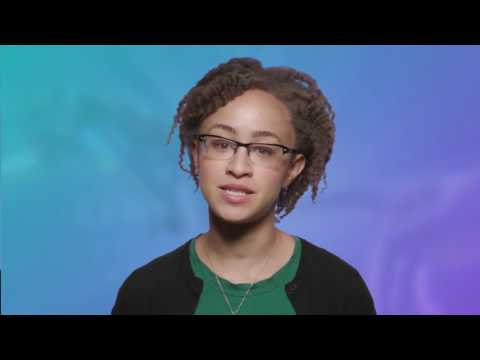

In [44]:
YouTubeVideo('HrYNL_1SV2Y')

## Capas convolucionales

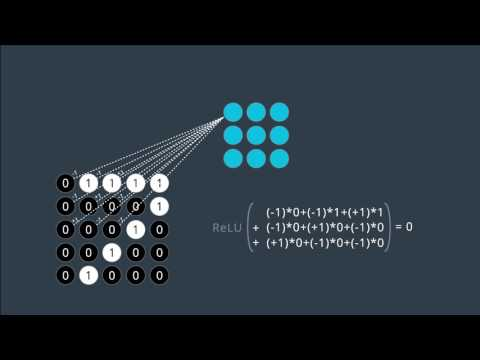

In [45]:
YouTubeVideo('h5R_JvdUrUI')

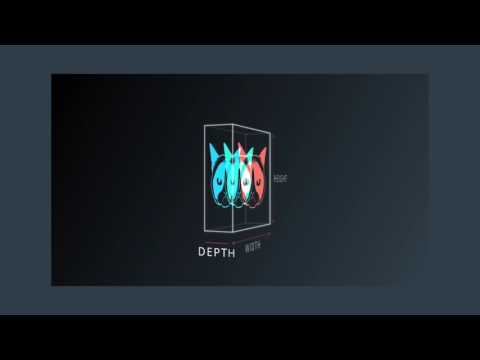

In [46]:
YouTubeVideo('RnM1D-XI--8')

## Capas pooling

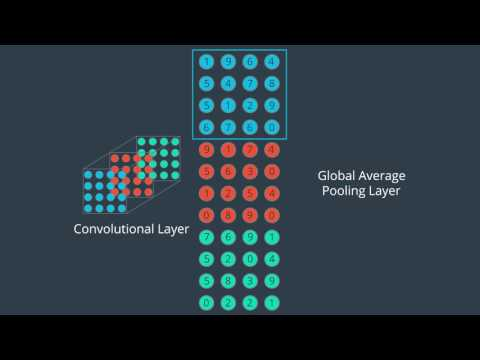

In [47]:
YouTubeVideo('OkkIZNs7Cyc')

## CNN en clasificación de imágenes

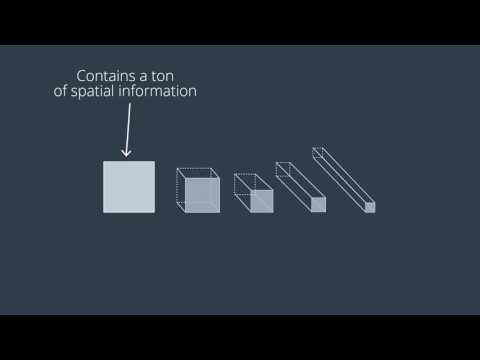

In [48]:
YouTubeVideo('l9vg_1YUlzg')

# Capas en las CNNs

## Capa convolucional:
**Su función es aumentar la profundidad (espacialidad --> features)**
![convolve.png](imgs/convolve.png)
- [Ver Ejemplo Auto](https://github.com/udacity/aind2-cnn/blob/master/conv-visualization/conv_visualization.ipynb)

### Hyperparámetros
- Para aumentar la dimensionalidad de una CNN: Aumento la **cantidad de filtros**
- Para incrementar el tamaño/complejidad de los patrones detectados: Aumento el **tamaño del filtro**
- **Stride**: Paso. Determina el tamaño de las salidas del siguiente nivel
- **Padding**: ¿Qué hacemos con los bordes? 'same': mantiene la dimensión de la entrada; 'valid': no padding

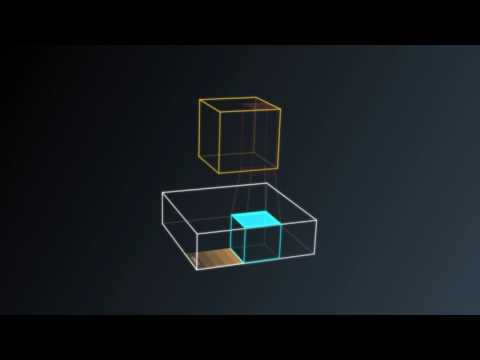

In [49]:
YouTubeVideo('Qt5SQNcQfgo')

### Como usamos esto en [keras](https://keras.io/layers/convolutional/)?

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, Dense, Flatten, MaxPooling2D, GlobalAveragePooling2D

In [51]:
model = Sequential()
model.add(Dense(100, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [52]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [53]:
model.compile(
    optimizer='Adam',
    metrics=['accuracy'],
    loss='categorical_crossentropy'
)

In [54]:
3*3*64*128 + 128

73856

In [55]:
model = Sequential()
model.add(Convolution2D(filters=32, strides=2, kernel_size=5, padding='same',
                        activation='relu',
                        input_shape=(2*640, 2*480, 3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=None, padding='valid'))
model.add(Convolution2D(filters=64, strides=2, kernel_size=3, padding='same',
                        activation='relu',
                        ))
model.add(Convolution2D(filters=128, strides=2, kernel_size=3, padding='same',
                        activation='relu',
                        ))
model.add(MaxPooling2D(pool_size=(2,2), strides=None, padding='same'))
model.add(Convolution2D(filters=256, strides=2, kernel_size=3, padding='same',
                        activation='relu',
                        ))
model.add(Convolution2D(filters=512, strides=2, kernel_size=3, padding='same',
                        activation='relu',
                        ))
model.add(Convolution2D(filters=1024, strides=1, kernel_size=3, padding='same',
                        activation='relu',
                        ))

# model.add(Flatten())
model.add(GlobalAveragePooling2D())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 640, 480, 32)      2432      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 320, 240, 32)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 160, 120, 64)      18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 80, 60, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 40, 30, 128)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 20, 15, 256)       295168    
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 10, 8, 512)      

In [56]:
3*5*5*32 + 32

2432

Hacer pruebas y explicar 'Output Shape' y 'Param #':
- filters=1, strides=1, kernel_size=1, padding='same'
- filters=16, strides=1, kernel_size=1, padding='same'
- filters=1, strides=1, kernel_size=4, padding='same'
- filters=10, strides=1, kernel_size=4, padding='same'
- filters=1, strides=2, kernel_size=5, padding='same'
- filters=1, strides=2, kernel_size=5, padding='valid'
- filters=16, strides=2, kernel_size=5, padding='same'
- filters=16, strides=4, kernel_size=4, padding='same', input_shape=(32,32,1)
- filters=16, strides=4, kernel_size=4, padding='same', input_shape=(32,32,3)

### Convolucionales vs Densas

Mirar cantidad de **parámetros** y **Output Shape**

Las CNN Reducen la cantidad de **parámetros** y la **cantidad de conexiones**

Si hago una analogía con una capa densa, ¿cuántas neuronas tengo a la salida en una CNN?
- Multiplico las dimensiones del output-shape

Supongamos una capa densa de 1250 neuronas con una entrada de una imagen de 28x28x1. ¿Cuántas conexiones tengo y cuántos parámetros?
- 784x1250 = 980.000 conexiones
- 784x1250 + 1250 = 981.250 parámetros

In [57]:
model = Sequential()
model.add(Dense(1250, input_shape=(None,784)))
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, None, 1250)        981250    
Total params: 981,250
Trainable params: 981,250
Non-trainable params: 0
_________________________________________________________________


Para una capa **convolucional** con la misma entrada y la misma cantidad de neuronas a la salida?
- Claramente depende del tamaño del kernel

In [58]:
model = Sequential()
model.add(Convolution2D(filters=2, 
                        strides=1, 
                        kernel_size=4, 
                        padding='valid',
                        activation='relu',
                        input_shape=(28,28,1)))
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 25, 25, 2)         34        
Total params: 34
Trainable params: 34
Non-trainable params: 0
_________________________________________________________________


Supongamos un kernel de 4x4 con 2 filtros y padding valid:
- (4x4 conexiones por neurona) x (25x25x2 Neuronas) = 20.000 conexiones
- (4x4)x2 + 2 = 34 parametros

La poca cantidad de parámetros respecto a conexiones se debe obviamente a que comparte parametros

Se podria entonces hacer que una capa densa tenga la misma salida que una convolucional usando valores de pesos convenientes.

La diferencia fundamental es que el aprendizaje es diferente ya que:
- Varios de los pesos deberian quedar en cero y no ser modificados por el algoritmo de aprendizaje
- Varios de los pesos, los compartidos, deberián moverse iguales

### Entendiendo la salida y los pesos
Una vez que aprendió los parámetros

In [59]:
def get_simple_model(activation = None, n_filters = 6, input_shape=(28,28,1)):
    model = Sequential()
    model.add(Convolution2D(filters=n_filters, 
                            kernel_size=3, 
                            input_shape=input_shape, 
                            name = 'Conv1',
                            padding= 'valid',
                            activation=activation
                           ))
    return model

In [60]:
canales_entrada = 6
model = get_simple_model(n_filters = 4, input_shape=(28,28,canales_entrada))
model.summary()
print('Tensor de pesos:', model.get_weights()[0].shape)
print('Biases:', model.get_weights()[1].shape)

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1 (Conv2D)               (None, 26, 26, 4)         220       
Total params: 220
Trainable params: 220
Non-trainable params: 0
_________________________________________________________________
Tensor de pesos: (3, 3, 6, 4)
Biases: (4,)


In [61]:
model.get_weights()[1].shape


(4,)

Modificar los canales de entrada y ver que:
- El Output Shape no cambia
- La tercer dimensión del tensor de pesos cambia (y por supuesto la cantidad de parámetros)

Es decir, la dimensión de los pesos es:  
**ancho x alto x canales x filtros**

Modificar tambien la cantidad de filtros para verificar como se cambia la ultima dimensión

### Analizando la salida filtrada

In [62]:
canales_entrada = 1
model = get_simple_model(n_filters = 6, input_shape=(28,28,canales_entrada))
model.summary()
print('Tensor de pesos:', model.get_weights()[0].shape)
print('Biases:', model.get_weights()[1].shape)

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1 (Conv2D)               (None, 26, 26, 6)         60        
Total params: 60
Trainable params: 60
Non-trainable params: 0
_________________________________________________________________
Tensor de pesos: (3, 3, 1, 6)
Biases: (6,)


In [63]:
# Matriz de 3x3 inicializada aleatoriamente
print(model.get_weights()[0][:,:,0,2])
# Biases inicializados en cero
print(model.get_weights()[1])

[[-0.26844198 -0.274048   -0.29590178]
 [ 0.29244605 -0.209458   -0.2731444 ]
 [ 0.10866392 -0.21460731  0.00729597]]
[0. 0. 0. 0. 0. 0.]


In [64]:
from CNN_analysis_helper import plot_filter_coefs, plot_conv_filters, generate_random_image, plot_activations

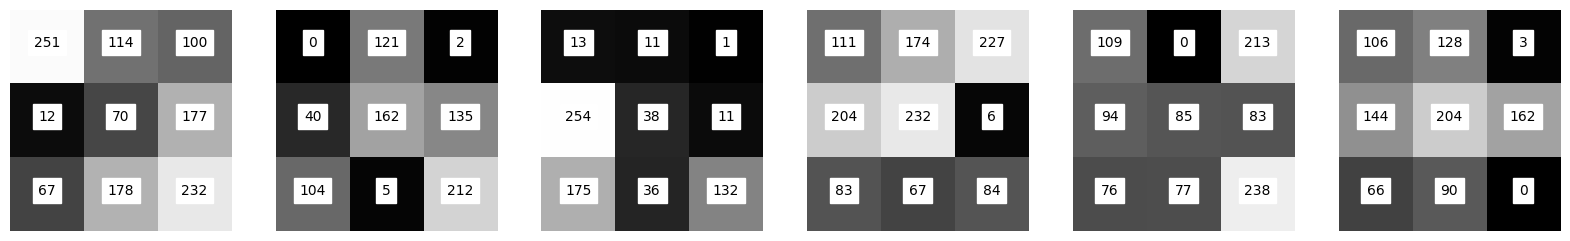

In [65]:
plot_filter_coefs('Conv1', model)

In [66]:
weights = model.get_layer('Conv1').get_weights()

In [67]:
weights[0][:,:,0,0] = np.array([[0, 0, 0], [0 , 1,  0], [0, 0, 0]])
weights[0][:,:,0,1] = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
weights[0][:,:,0,2] = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
weights[0][:,:,0,3] = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]]).T
weights[0][:,:,0,4] = np.array([[-1,-1, 0], [-1 , 0,  1], [0, 1, 1]])
weights[0][:,:,0,5] = np.array([[1 , 1,  1], [1, 1, 1], [1, 1, 1]])

# Normalizo
weights[0] = weights[0]/np.sqrt((weights[0]*weights[0]).sum(axis=0).sum(axis=0))
model.get_layer('Conv1').set_weights(weights)

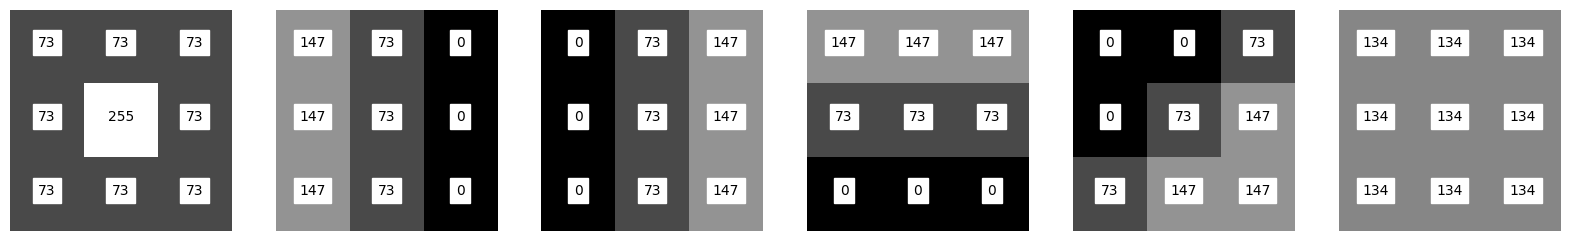

In [68]:
plot_filter_coefs('Conv1', model, normalize=True)

In [69]:
images_to_filter = np.load('images_to_filter.npy')
print(images_to_filter.shape)
activations_conv1_output = model.predict(images_to_filter)
print(activations_conv1_output.shape)

(5, 28, 28, 1)
(5, 26, 26, 6)


# Sin función de activación

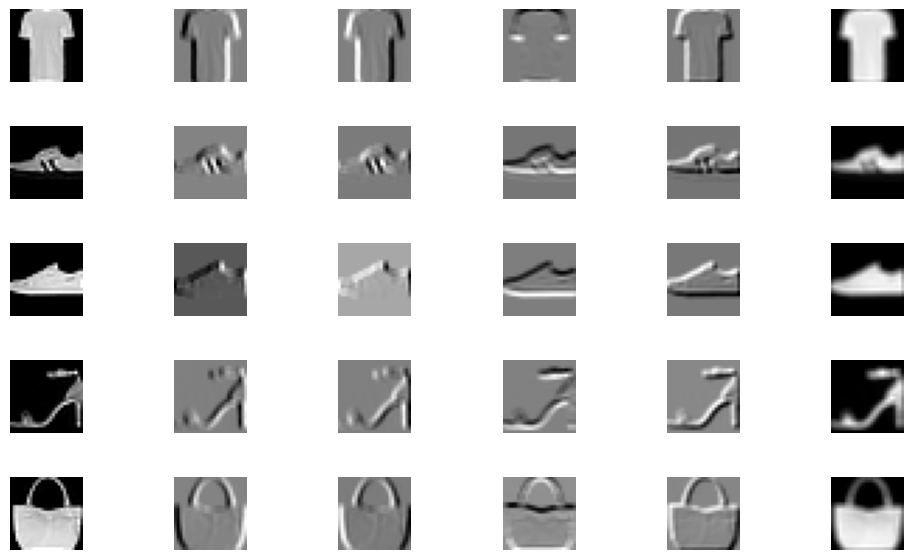

In [70]:
plot_activations(activations_conv1_output)

# Con Relu

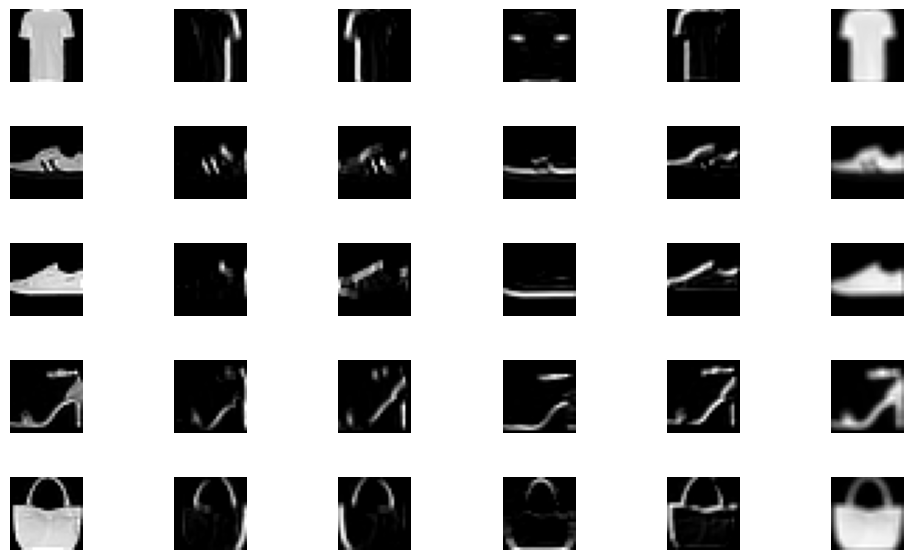

In [71]:
model_relu = get_simple_model('relu')
model_relu.set_weights(weights)
activations_output_relu = model_relu.predict(images_to_filter)
plot_activations(activations_output_relu)

# Con sigmoidea

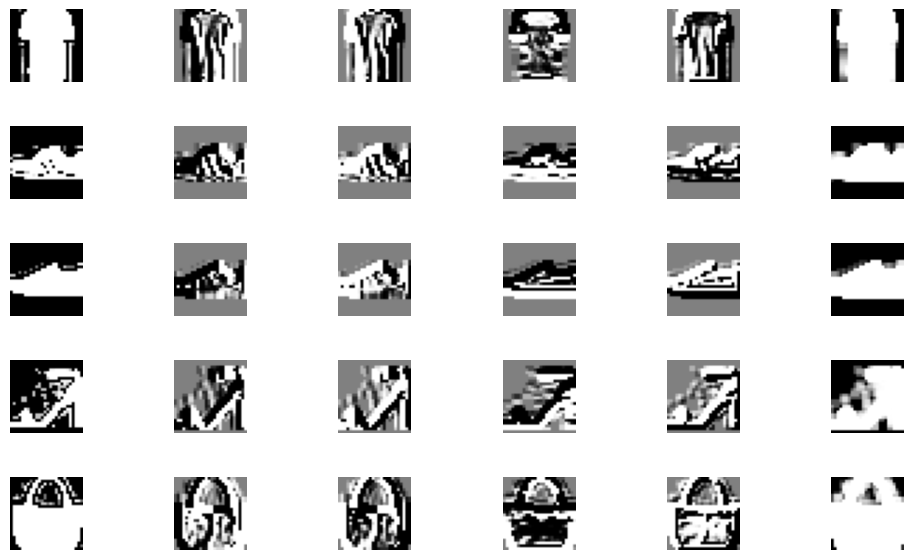

In [72]:
model_sigmoid = get_simple_model('sigmoid')
model_sigmoid.set_weights(weights)
activations_output_sigmoid = model_sigmoid.predict(images_to_filter)
plot_activations(activations_output_sigmoid)

# Sigmoidea normalizando

In [73]:
images_to_filter.max(), images_to_filter.min()

(255, 0)

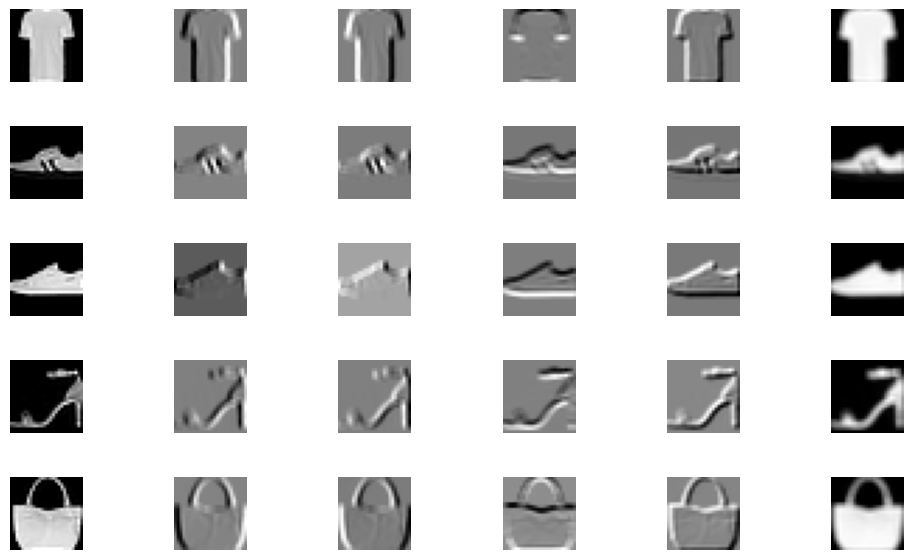

In [74]:
model_sigmoid_2 = get_simple_model('sigmoid')
model_sigmoid_2.set_weights(weights)
activations_output_sigmoid = model_sigmoid_2.predict(images_to_filter/256)
plot_activations(activations_output_sigmoid)

# Imagenes grandes con capa densa

In [75]:
model = Sequential()
model.add(Dense(100, input_shape=(None,500*375)))
model.add(Dense(5, input_shape=(None,500*375)))
model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, None, 100)         18750100  
_________________________________________________________________
dense_13 (Dense)             (None, None, 5)           505       
Total params: 18,750,605
Trainable params: 18,750,605
Non-trainable params: 0
_________________________________________________________________


## Capa Pooling
### MaxPooling
**Su función es reducir la cantidad de parámetros, bajar la dimensionalidad**

Max Pooling
![Max-polling.png](imgs/Max-polling.png)

#### Hyperparámetros
MaxPooling
- Pool size
- Strides: En este caso está en None por default lo que significa que strides=pool_size

#### En [keras](https://keras.io/layers/pooling/)

In [76]:
from tensorflow.keras.layers import MaxPooling2D

In [77]:
model = Sequential()
model.add(MaxPooling2D(pool_size=(2,2), strides=None, padding='same', input_shape=(32,32,1)))
model.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 1)         0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


Hacer pruebas y explicar 'Output Shape' y 'Param #':
- pool_size=(2,2), strides=None, padding='same'
- pool_size=(4,2), strides=None, padding='same'
- pool_size=(3,3), strides=None, padding='same'
- pool_size=(3,3), strides=None, padding='valid'


In [78]:
def get_simple_model_pool(activation = None, n_filters = 6, input_shape=(28,28,1)):
    model = Sequential()
    model.add(Convolution2D(filters=n_filters, 
                            kernel_size=3, 
                            input_shape=input_shape, 
                            name = 'Conv1',
                            padding= 'valid',
                            activation=activation
                           ))
    model.add(MaxPooling2D(3))
    return model

In [79]:
model_pool = get_simple_model_pool(activation='relu')

In [80]:
model_pool.get_layer('Conv1').set_weights(weights)

In [81]:
activations_pool_output = model_pool.predict(images_to_filter)
print(activations_pool_output.shape)

(5, 8, 8, 6)


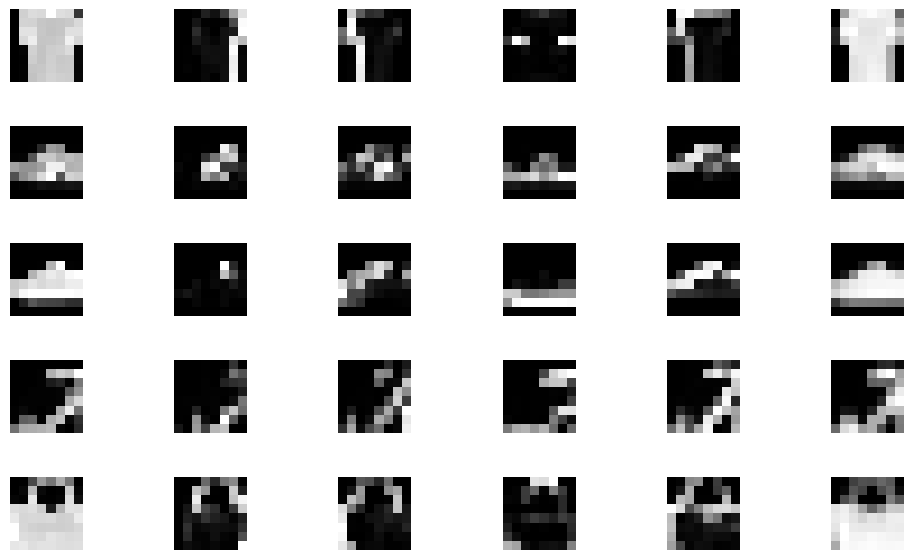

In [82]:
plot_activations(activations_pool_output)

### Global Average Pooling  
- Un resultado(Promedio) por cada canal
- Utilizada para reducir la dimensionalidad en las ultimas capas
![GAP.png](imgs/GAP.png)

#### En [keras](https://keras.io/layers/pooling/)

In [84]:
from tensorflow.keras.layers import GlobalAveragePooling2D, Flatten

In [85]:
model = Sequential()
model.add(GlobalAveragePooling2D(input_shape=(32,32,20)))
model.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_2 ( (None, 20)                0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


### AveragePooling

In [87]:
from tensorflow.keras.layers import AveragePooling2D

In [88]:
model = Sequential()
model.add(AveragePooling2D(4, 4, input_shape=(32,32,20)))
model.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
average_pooling2d (AveragePo (None, 8, 8, 20)          0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


## Preguntas:

- Como cierro la red? Que utlilzar? GAP o DENSA?
- Que implica hacer mas grande o mas pequeño el filtro?

# Armamos la red AlexNet:

### AlexNet [(paper)](http://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf)
- 2012 
- Error de top-5 de 15.3%, más de 10.8% arriba del segundo. 
- ImageNet: En 1.2 millones de imágenes de alta resolución, 1000 clases
- Diseñada por: SuperVision group, consisting of Alex Krizhevsky, Geoffrey Hinton, and Ilya Sutskever.

**Lo novedoso**: Dropout, RELUs
(Dropout a la salida de las capas de 2048)

**Arquitectura:**
- Rectangulares con center-crop (Lado mas corto 256)
- 60 millones de parámetros
- 650 mil neuronas
- 5 capas convolucionales
- Algunos seguidos de capas pooling
- 3 capas densas
- SoftMax de 1000 categorias (1000 neuronas a la salida)
- RELUs en vez de Sigmoideas
- Dropout para evitar regularización

**Entrenamiento:**
- CUDA para soporte de GPU
- Data augmentation
- SGD
- Batch size = 128
- Momentum 0.9
- Learning rate = 0.01
- weight decay of 0.0005 (equivalente a L2 regularization)
- 5 a 6 días de entrenamiento en 2 [GTX 580](https://www.geforce.com/hardware/desktop-gpus/geforce-gtx-580) 3GB GPUs

![alexnet2.png](imgs/alexnet2.png)

# Armarla con Keras:

In [89]:
from solutions import get_alexnet

In [92]:
from tensorflow.keras.layers import Dropout

In [93]:
alexnet_model = Sequential()
alexnet_model.add(Convolution2D(filters=96, kernel_size=11, strides=4,
                                input_shape=(227,227,3), 
                                padding='valid', activation='relu'))
alexnet_model.add(MaxPooling2D(pool_size = 3, strides=2))
alexnet_model.add(Convolution2D(filters=256, kernel_size=5, padding='same', activation='relu'))
alexnet_model.add(MaxPooling2D(pool_size = 3, strides=2))
alexnet_model.add(Convolution2D(filters=384, kernel_size=3, padding='same', activation='relu'))
alexnet_model.add(Convolution2D(filters=384, kernel_size=3, padding='same', activation='relu'))
alexnet_model.add(Convolution2D(filters=256, strides=2, kernel_size=3, padding='valid', activation='relu'))
alexnet_model.add(Flatten())
alexnet_model.add(Dense(4096, activation='relu'))
alexnet_model.add(Dropout(0.5))
alexnet_model.add(Dense(4096, activation='relu'))
alexnet_model.add(Dropout(0.5))
alexnet_model.add(Dense(1000, activation='softmax'))
alexnet_model.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 27, 27, 256)       614656    
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 13, 13, 384)       885120    
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 13, 13, 384)       1327488   
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 6, 6, 256)       

## Reemplazo de FC por Convolucionales e implementación de sliding window eficiente

Supongamos que tengo una entrada de 5x5. Si hago flatten para poner una FC, me queda una entrada de 25x1.  
La cantidad de parámetros a aprender suponiendo que tengo una salida con 4 neuronas es:  
25*4 + 4 = 104

In [95]:
from tensorflow.keras.layers import Dense
model_dense = Sequential()
model_dense.add(Dense(4, input_shape=(25,)))
model_dense.summary()

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 4)                 104       
Total params: 104
Trainable params: 104
Non-trainable params: 0
_________________________________________________________________


Si utilizo una convolucional con la misma entrada que salida, para tener la misma cantidad de parámetros, tengo que poner el tamaño del filtro igual a la entrada: 5x5  
Y la cantidad de filtros igual a la salida

In [98]:
model_slide = Sequential()
model_slide.add(Convolution2D(filters= 4, kernel_size=5, input_shape=(5,5,1)))
model_slide.summary()

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 1, 1, 4)           104       
Total params: 104
Trainable params: 104
Non-trainable params: 0
_________________________________________________________________


Que pasa si aumento la entrada:

In [100]:
width = 20
height = width
model_slide = Sequential()
model_slide.add(Convolution2D(filters=4, kernel_size=5, input_shape=(height,width,1)))
model_slide.summary()

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 16, 16, 4)         104       
Total params: 104
Trainable params: 104
Non-trainable params: 0
_________________________________________________________________


![](imgs/sliding-wind-implem.png)

<pre>Layer         kernel  stride  output shape
---------------------------------------------
Input                          (416, 416, 3)
Convolution    3×3      1      (416, 416, 16)
MaxPooling     2×2      2      (208, 208, 16)
Convolution    3×3      1      (208, 208, 32)
MaxPooling     2×2      2      (104, 104, 32)
Convolution    3×3      1      (104, 104, 64)
MaxPooling     2×2      2      (52, 52, 64)
Convolution    3×3      1      (52, 52, 128)
MaxPooling     2×2      2      (26, 26, 128)
Convolution    3×3      1      (26, 26, 256)
MaxPooling     2×2      2      (13, 13, 256)
Convolution    3×3      1      (13, 13, 512)
MaxPooling     2×2      1      (13, 13, 512)
Convolution    3×3      1      (13, 13, 1024)
Convolution    3×3      1      (13, 13, 1024)
Convolution    1×1      1      (13, 13, 125)
</pre>